# **Inteligência Artificial - IC/UFRJ - 2022/1**
## **Tarefa 3 - Hill Climbing**
### Prof. João Carlos Pereira da Silva
#### João Ricardo Campbell Maia (DRE: 116111909)
#### Roberto Leonie Ferreira Moreira (DRE: 116062192)

## **1. Modelagem**

Inicialmente, será passada ao programa uma entrada $N$ da qual representa o tamanho do tabuleiro e do problema das $N$-rainhas.

Nossa representação do tabuleiro será um *array* de $N$ elementos, do qual o valor contido no índice $i$ do *array* corresponderá a linha em que a $(i+1)$-rainha se encontra na configuração dada, uma vez que esta mesma rainha se encontra na coluna $(i+1)$ do tabuleiro.

## **2. Implementação Base**

### A. `tabuleiro(int N, int Q)`

Esta função possui como entrada o tamanho $N$ do problema das $N$-rainhas e o número $Q$ de tabuleiros a ser gerados. Essas configurações iniciais possuem posições das rainhas geradas aleatoriamente.

A função `tabuleiro()` retornará **uma lista de listas contendo $Q$ tabuleiros de tamanho $N$ x $N$ cada**, representados conforme descrito anteriormente no tópico 1. A função também retorna o número $Q$ de tabuleiros.

In [327]:
import random
import matplotlib.pyplot as plt

# retornar Q tabuleiros quadrados de tamanho N cada
def tabuleiro(N, Q):
  posicoes_das_rainhas = []
  lista_de_tabuleiros = []

  for i in range(0, Q):
    for j in range(0, N):
      # gerando numero aleatorialo no intervalo [1,N+1) e guardando na lista
      posicoes_das_rainhas.append(random.randrange(1,N+1))
    lista_de_tabuleiros.append(posicoes_das_rainhas)
    # se faz necessario esvaziar a estrutura
    posicoes_das_rainhas = []

  return lista_de_tabuleiros

In [328]:
tabuleiro(4, 4)

[[2, 2, 4, 1], [3, 4, 1, 1], [1, 3, 2, 2], [1, 2, 1, 3]]

### B. `todosVizinhos(T)`

Inicialmente, precisamos armazenar um tabuleiro gerado anteriormente em uma variável auxiliar para que seja definido como parâmetro de entrada da função `todosVizinhos()`. 

Será necessária a criação de uma função auxiliar `geraTabuleiro(int N, int Q)`, da qual recebe como argumento o tamanho do problema das $N$-rainhas e a quantidade $Q$ de tabuleiros anteriormente gerados, retornando assim um destes tabuleiros escolhidos ao acaso.

No nosso caso, a variável auxiliar `tabuleiro_inicial` será passada como parâmetro de entrada da função `todosVizinhos()` de modo a obter todos os vizinhos da configuração de partida.

Será criada uma estrutura global chamada `lista_de_vizinhos[]`. 

Também serão definidas as operações auxiliares de `cima(T)` e `baixo(T)`, **para que seja possível subir e descer**, respectivamente, com uma dada rainha do problema. Uma vez que nossa representação (*array*) inviabiliza dois valores para um mesmo índice (como em um *map*, por exemplo) duas ou mais rainhas em uma mesma coluna não são possíveis. Dessa forma, portanto, não serão necessárias as operações de `esquerda` e `direita` para mover as rainhas.

In [329]:
# a funcao todosVizinhos(T)
def todosVizinhos(tab):
  N = len(tab)
  neighbors = []
  for i in range(1,N+1,1):
    for j in range(1,N+1,1):
      if tab[i-1] == j:
        continue
      else:
        possibleState = tab.copy()
        possibleState[i-1] = j
        neighbors.append(possibleState)
        
  return neighbors
  

### C. `umVizinho(T)`

Neste caso, inicialmente dada como **entrada um tabuleiro $T$**, será armazenado apenas **um dos vizinhos de T$** de modo a este ser obtido de maneira estocástica. Dessa forma, podemos novamente chamar a função `todosVizinhos()` dentro da função `umVizinho()`.

In [330]:
import random

def umVizinho(T):
  
  vizinhos = todosVizinhos(T)          # gerando todos os vizinhos da configuracao de entrada
  aleatorio = random.randrange(0, len(vizinhos))   # sorteando um numero entre 0 e o numero de vizinhos de T
  vizEscolhido = vizinhos[aleatorio]

  return vizEscolhido

### D. `numeroAtaques()`

A partir de um tabuleiro $T$ passado como **parâmetro de entrada**, esta função irá calcular **o número total de ataques mútuos entre cada uma das $N$-rainhas duas a duas.** Dessa forma, seu valor de **saída** é apenas um número, neste caso, o **número de ataques totais do tabuleiro.**

É importante observar que apenas **será analisado ataques potenciais entre rainhas em uma mesma linha (posição horizontal) ou posição diagonal**, visto que **é impossível existir duas ou mais rainhas em uma mesma coluna na nossa representação.**

Durante a elaboração de como resolver este problema, a dupla induziu o fato de que existe uma relação direta entre o **número de ataques entre rainhas na horizontal** e a **quantidade de vezes que um valor ocorre no nosso *array* de representação do tabuleiro**.

Por exemplo, a partir da configuração de entrada

\begin{align}
\ [4, 3, 2, 2, 1, 3, 2, 5]
\end{align}

temos ataques entre:

1.   rainha$_{2,3}$ e rainha$_{2,4}$ 
2.   rainha$_{2,3}$ e rainha$_{2,7}$
3.   rainha$_{2,4}$ e rainha$_{2,7}$
4.   rainha$_{3,2}$ e rainha$_{3,6}$

Totalizando, para esta configuração, **4 ataques na horizontal**. 
Note que isto pode ser considerado equivalente a quantidade de vezes que $2$ aparece no array - 1 (algo como um *count*) somado a quantidade de vezes que $3$ aparece no array - 1, de forma

\begin{align}
\ count(4) - 1 + count(3) - 1 + count(2) - 1 + count(1) - 1 + count(5) - 1 =
\ \sum\limits_{i=1}^{\mbox{5}}(count(i) - i)
\end{align}

em que, neste nosso caso, 5 é a quantidade de elementos que aparece **pelo menos uma vez** no *array*.

Generalizando este somatório para um $L$, do qual $L$ é **o número de linhas distintas que são visitadas pelo menos uma vez por cada rainha**, temos

\begin{align}
\ \sum\limits_{i=1}^{\mbox{L}}(count(i) - i)
\end{align}

Todavia, durante a implementação foi analisado que **o programa perde corretude em número de ataques quando mais de duas rainhas estão posicionadas sobre uma mesma linha!** Neste caso, com **mais de duas rainhas em uma mesma linha**, temos

\begin{align}
numeroAtaques =  \sum\limits_{i=1}^{\mbox{L}}count(i)
\end{align}



In [331]:
def numeroAtaques(T):
  # a variavel de retorno
  numAtaques = 0

  # variaveis auxiliares horizontal (linha) e diagonal
  numAtaquesHoriz = 0
  numAtaquesDiag = 0

  # CALCULO DO NUMERO DE ATAQUES NA HORIZONTAL
  # precisaremos armazenar o tamanho do tabuleiro inicial
  N = len(T)

  # para cada linha do tabuleiro de tamanho N
  for lin in range(1, N+1):
    # so podemos avaliar ataques 
    # se a linha do tabuleiro esta visitada por 2 ou mais ataques

    # com duas rainhas na mesma linha
    if(T.count(lin) == 2) :
      numAtaquesHoriz += (T.count(lin) - 1)

    # com mais de duas rainhas na mesma linha a situacao fica
    # mais complicada: o numero de ataques entre as pecas deve ser
    # EXATAMENTE O NUMERO DE RAINHAS NA MESMA LINHA!
    if(T.count(lin) > 2) :
      numAtaquesHoriz += T.count(lin)


  # CALCULO DO NUMERO DE ATAQUES NA DIAGONAL
  for i in range(0, (N-1)) :
    for j in range((i+1), N):
       # se |Qi - Qj| == |i-j|, eh um ataque em potencial
        if(abs(T[i] - T[j]) == abs(i-j)) :
          numAtaquesDiag += 1

  # somando os ataques, temos
  numAtaques = numAtaquesHoriz + numAtaquesDiag

  return numAtaques

## **3. Hill Climbing**

Como o algoritmo de *Hill Climbing* é um algoritmo de **maximização**, estamos interessados em obter **o maior valor possível de uma determinada função de avaliação $f(n)$**. Sendo assim, uma vez que estamos interessados em obter uma configuração de tabuleiro que possua o **menor número de ataques entre rainhas**, seja a nossa função $f(n)$ da forma

\begin{align}
\ f(n) = -h(n)
\end{align}

da qual desejamos maximizar $f$. 

Naturalmente, o maior valor possível de $f$ é $f(n) = 0$. Ou seja, uma configuração atingida da qual **não seja possível ter ataques entre nenhuma das rainhas duas a duas.**


### A. Versão Primeira Escolha

Nesta versão do algoritmo, o tabuleiro sucessor $T_{s}$ do tabuleiro corrente $T_{c}$ será o primeiro vizinho de $T_{c}$ que tem uma avaliação melhor.

Assim, se a avaliação do tabuleiro corrente $T_{c}$ for igual a $h$, o primeiro tabuleiro vizinho de $T_{c}$ encontrado com avaliação menor que $h$ deve passar a ser o novo tabuleiro corrente.

Usaremos a função `umVizinho(T)` para gerar **um único vizinho do nó $T_{c}$**. O programa encerra quando não houver nenhum vizinho que melhore a avaliação do nó corrente $T_{c}$.

Logo, será criada a função `primeiraEscolha(T)` da qual **recebe como entrada um tabuleiro inicial $T$ e devolve como saída o melhor vizinho de um estado corrente com maior valor de $f$ (menor valor de $h$) obtido com a configuração dada ou os vizinhos dessa configuração.**


In [332]:
def primeiraEscolha(t):
  neighbors = todosVizinhos(t) 
  random.shuffle(neighbors) # embaralhando a lista para garantir que a seleção é aleatória
  h = numeroAtaques(t)
  for board in neighbors:
    if numeroAtaques(board) < h:
      return board
  else:
    return t

In [333]:
def HillClimbingPrimeiraEscolha(tab):
  i = 0
  while True:
    i+= 1
    h = numeroAtaques(tab)
    valoresHeuristicas.append(-h) # append da funcao de avaliacao f(n) = -h(n) (maximizacao)
    tab = primeiraEscolha(tab)
    if numeroAtaques(tab) == h or numeroAtaques(tab) == 0:
      break

  valoresHeuristicas.append(-numeroAtaques(tab))
  return tab

### B. Versão Melhor Escolha

Para esta versão, todos os tabuleiros vizinhos do tabuleiro corrente $T_{c}$
são gerados e avaliados. O tabuleiro escolhido é aquele que possui **a melhor avaliação entre todos os tabuleiros vizinhos gerados.** 

O programa para quando não há mais nenhum vizinho que melhora a avaliação do nó (tabuleiro) corrente $T_{c}$.

In [334]:
def melhorEscolha(t):
  neighbors = todosVizinhos(t)
  bestBoard = t
  for board in neighbors:
    if numeroAtaques(board) < numeroAtaques(bestBoard):
      bestBoard = board
  return bestBoard

In [335]:
def HillClimbingMelhorEscolha(tab):
  h = numeroAtaques(tab)
  i = 0
  while True:
    i+=1
    h = numeroAtaques(tab)
    valoresHeuristicas.append(-h)
    tab = melhorEscolha(tab)
    if numeroAtaques(tab) == h or numeroAtaques(tab) == 0:
      break
  
  valoresHeuristicas.append(-numeroAtaques(tab))
  return tab

### C. Análise
Aqui, temos as seguintes premissas:


*   O tabuleiro inicial é gerado usando a função `tabuleiro()`.
*   A avaliação dos tabuleiros é feita através da função `numeroAtaques()`.
*   A análise é feita para tamanhos de tabuleiro $4$, $8$, $16$ e $32$.

Para o **Algoritmo de Hill Climbing de Primeira Escolha**, temos a seguinte análise:



In [336]:
%%time
# É necessário o armazenamento dos valores das heuristicas em uma estrutura global
valoresHeuristicas = []

# ALGORITMO DE PRIMEIRA ESCOLHA:
print("HILL CLIMBING PRIMEIRA ESCOLHA: " + "\n\n")


def plotaTabPE(N) :
  primEscolha = 0
  tabs = tabuleiro(N, 1)
  print("Tabuleiro de tamanho ", N)

  for tab in tabs:
    if (numeroAtaques(HillClimbingPrimeiraEscolha(tab)) == 0):
      primEscolha +=1


  print("Soluções encontradas (ao fim): ",primEscolha,"\n")
  plt.plot(valoresHeuristicas)
  plt.title('Tabuleiro de tamanho %d' % N)
  plt.xlabel('Passos')
  plt.ylabel('f(n) = -h(n)')
  plt.show()
  print("\n\n")




HILL CLIMBING PRIMEIRA ESCOLHA: 


CPU times: user 878 µs, sys: 0 ns, total: 878 µs
Wall time: 884 µs


Tabuleiro de tamanho  4
Soluções encontradas (ao fim):  0 



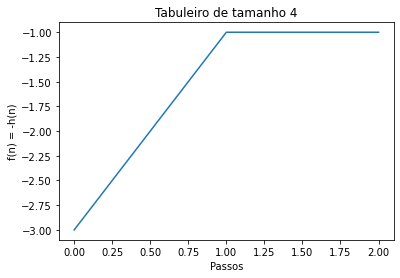

In [337]:
plotaTabPE(4) # plotagem da funcao de avaliacao do tabuleiro de dimensao 4
valoresHeuristicas = [] # esvaziamento da estrutura global que armazena heuristicas

Tabuleiro de tamanho  8
Soluções encontradas (ao fim):  0 



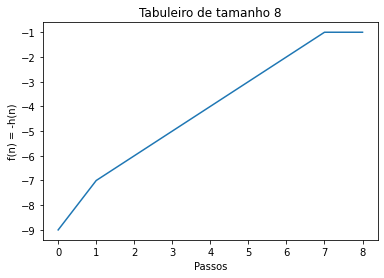

In [338]:
plotaTabPE(8)
valoresHeuristicas = []

Tabuleiro de tamanho  16
Soluções encontradas (ao fim):  0 



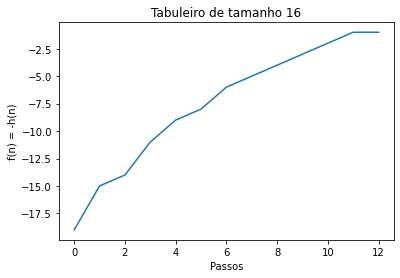

In [339]:
plotaTabPE(16)
valoresHeuristicas = []

Tabuleiro de tamanho  32
Soluções encontradas (ao fim):  0 



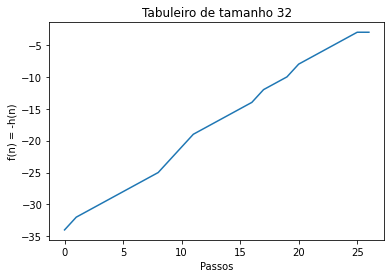

In [340]:
plotaTabPE(32)
valoresHeuristicas = []

**É importante observar que cada ponto de máximo (subida) representa a mudança de uma dimensão $N$ de tabuleiro para outro.**

Já para o **Algoritmo de Hill Climbing de Melhor Escolha**, temos a seguinte análise:

In [341]:
%%time
valoresHeuristicas = []

# ALGORITMO DE MELHOR ESCOLHA:
print("HILL CLIMBING MELHOR ESCOLHA: " + "\n\n")


def plotaTabME(N) :
  melEscolha = 0
  tabs = tabuleiro(N, 1)
  print("Tabuleiro de tamanho ", N)

  for tab in tabs:
    if (numeroAtaques(HillClimbingMelhorEscolha(tab)) == 0):
      melEscolha +=1


  print("Soluções encontradas (ao fim): ",melEscolha,"\n\n")
  plt.plot(valoresHeuristicas)
  plt.title('Tabuleiro de tamanho %d' % N)
  plt.xlabel('Passos')
  plt.ylabel('f(n) = -h(n)')
  plt.show()
  print("\n\n")


HILL CLIMBING MELHOR ESCOLHA: 


CPU times: user 1.4 ms, sys: 0 ns, total: 1.4 ms
Wall time: 1.13 ms


Tabuleiro de tamanho  4
Soluções encontradas (ao fim):  1 




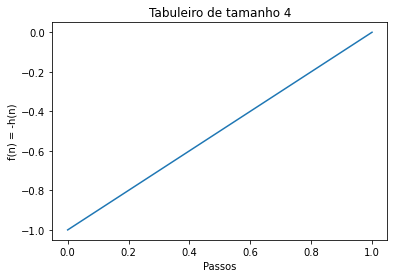

In [342]:
plotaTabME(4) # plotagem (Melhor Escolha) de tabuleiro de dimensao 4
valoresHeuristicas = [] # esvaziamento da estrutura global


Tabuleiro de tamanho  8
Soluções encontradas (ao fim):  0 




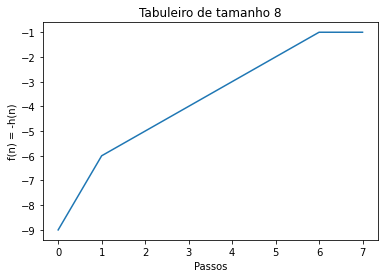

In [343]:
plotaTabME(8)
valoresHeuristicas = []

Tabuleiro de tamanho  16
Soluções encontradas (ao fim):  0 




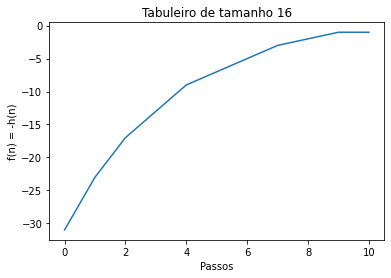

In [344]:
plotaTabME(16)
valoresHeuristicas = []

Tabuleiro de tamanho  32
Soluções encontradas (ao fim):  0 




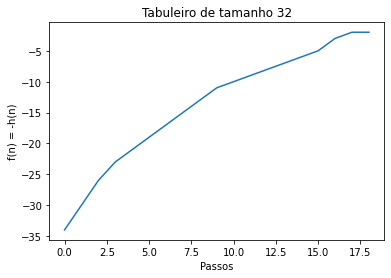

In [345]:
plotaTabME(32)
valoresHeuristicas = []

**É importante observar que cada ponto de máximo (subida) representa a mudança de uma dimensão $N$ de tabuleiro para outro.**

### D. Considerações Finais

A primeira coisa que percebemos é que a velocidade de convergência do **Algoritmo de *Melhor Escolha*** é **muito mais rápida**. Todavia, existe um **aumento significativo** quanto ao **tempo de execução** deste algoritmo, pois faz-se necessária a **avaliação de cada estado vizinho do tabuleiro corrente $T_{c}$**. Além disso, quando dimensões maiores $N$ de tabuleiros são escolhidas, esse aumento torna-se evidenciável de maneira exponencial.

**Não foram encontradas diferenças significativas na probabilidade de se chegar a uma solução.** Ambas as implementações sugerem ficar no intervalo por volta de $15\%$ para tabuleiros de dimensão $8$ (dimensões maiores não foram testadas pelo tempo de execução da versão de *Melhor Escolha*).

Uma proposta da dupla é implementar **"múltiplas execuções até chegar a uma solução"**, visto que **não é intuitivo para uma função poder ou não retornar o resultado esperado.**